### Viés e Variância

In [1]:
import scipy.io as spio
import numpy as np  
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from aprendizado_maquina import regressao_linear as rl
%matplotlib inline

In [2]:
data = spio.loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['__globals__', '__header__', '__version__', 'Xval', 'yval', 'y', 'Xtest', 'X', 'ytest'])

In [10]:
y = data['y']
X = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]

print('X_train:', X.shape)
print('y_train:', y.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


In [13]:
def curva_aprendizado(X, y, Xval, yval, reg):
    m = y.size
    
    erro_de_treinamento = np.zeros((m, 1))
    erro_de_validacao = np.zeros((m, 1))
    
    for i in np.arange(m):
        res = rl.treinar_modelo(X[:i+1], y[:i+1], reg)
        erro_de_treinamento[i] = rl.custo_regressao_linear_regularizada(res.x, X[:i+1], y[:i+1], reg)
        erro_de_validacao[i] = rl.custo_regressao_linear_regularizada(res.x, Xval, yval, reg)
    
    return(erro_de_treinamento, erro_de_validacao)

In [17]:
erro_de_treinamento, erro_de_validacao = curva_aprendizado(X, y, Xval, yval, 0)

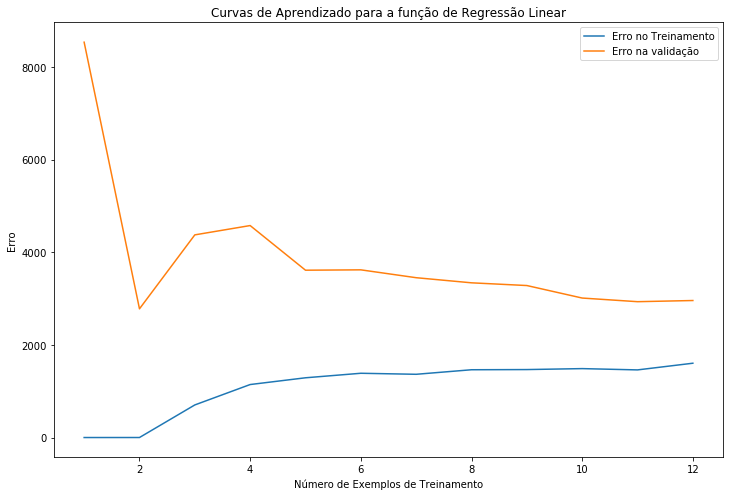

In [21]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,13), erro_de_treinamento, label='Erro no Treinamento')
plt.plot(np.arange(1,13), erro_de_validacao, label='Erro na validação')
plt.title('Curvas de Aprendizado para a função de Regressão Linear')
plt.xlabel('Número de Exemplos de Treinamento')
plt.ylabel('Erro')
plt.legend();